# **México**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Datos_limpios_México.csv')

In [3]:
columnas = ['room_type', 'price', 'host_acceptance_rate', 'host_is_superhost', 'accommodates', 'bathrooms', 'review_scores_cleanliness', 'host_identity_verified', 'instant_bookable', 'property_type', 'review_scores_rating', 'reviews_per_month', 'host_total_listings_count' ]
df0 = df[columnas]

In [ ]:
tipo_de_cambio = 0.053
df0 = df0.dropna(subset=['price'])
df0['price'] = df0['price'].replace({'\$': '', ',': ''}, regex=True)
df0['price'] = pd.to_numeric(df0['price'], errors='coerce')
df0['price_usd'] = df0['price'] * tipo_de_cambio

In [3]:
columnas = ['room_type', 'price', 'host_acceptance_rate', 'host_is_superhost', 'accommodates', 'bathrooms', 'review_scores_cleanliness', 'host_identity_verified', 'instant_bookable', 'property_type', 'review_scores_rating', 'reviews_per_month', 'host_total_listings_count' ]
df1 = df[columnas]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room_type                  9447 non-null   object 
 1   price                      9447 non-null   object 
 2   host_acceptance_rate       9447 non-null   float64
 3   host_is_superhost          9447 non-null   object 
 4   accommodates               9447 non-null   float64
 5   bathrooms                  9447 non-null   float64
 6   review_scores_cleanliness  9447 non-null   float64
 7   host_identity_verified     9447 non-null   object 
 8   instant_bookable           9447 non-null   object 
 9   property_type              9447 non-null   object 
 10  review_scores_rating       9447 non-null   float64
 11  reviews_per_month          9447 non-null   float64
 12  host_total_listings_count  9447 non-null   float64
dtypes: float64(7), object(6)
memory usage: 959.6+ KB

In [ ]:
tipo_de_cambio = 0.053
df1 = df1.dropna(subset=['price'])
df1['price'] = df1['price'].replace({'\$': '', ',': ''}, regex=True)
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')
df1['price_usd'] = df1['price'] * tipo_de_cambio


In [5]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [6]:
type(model)

sklearn.linear_model._base.LinearRegression

In [7]:
df1['room_type'] = df1['room_type'].replace({'Entire home/apt': 1, 'Hotel room': 2, 'Private room': 3, 'Shared room':4 })

C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\2596819896.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['room_type'] = df1['room_type'].replace({'Entire home/apt': 1, 'Hotel room': 2, 'Private room': 3, 'Shared room':4 })


In [8]:
Y= df1['price_usd']
X1= df1['room_type'].to_frame()

In [9]:
model.fit(X=X1, y=Y)

LinearRegression()

In [10]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-40.04190566]),
 'rank_': 1,
 'singular_': array([89.08084087]),
 'intercept_': 201.55311387470852}

<Axes: xlabel='room_type', ylabel='price_usd'>

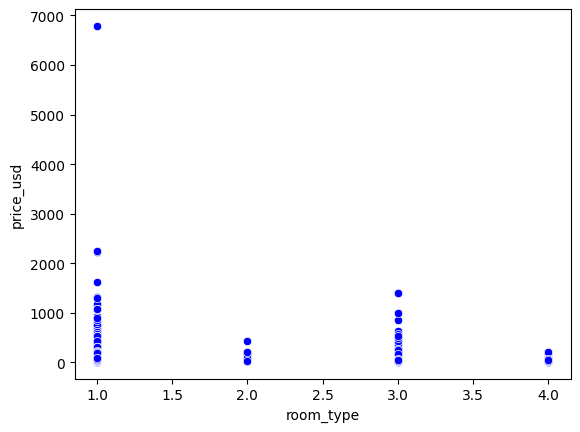

In [11]:
from turtle import color 
sns.scatterplot(x='room_type', y='price_usd', color="blue", data=df1)

In [12]:
coef_Deter= model.score(X=X1, y=Y)
coef_Deter

0.08622004439365516

In [13]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

0.2936324988717277

# **“price vs host_acceptance rate”**

In [108]:
#Analizar categorias de una columna
dataf = df0.groupby(['room_type'])['room_type'].count()
dataf

room_type
Entire home/apt    6721
Hotel room           14
Private room       2659
Shared room          53
Name: room_type, dtype: int64

In [234]:
df2 = df0[df0['room_type'] == 'Entire home/apt']
df3 = df0[df0['room_type'] == 'Hotel room']
df4 = df0[df0['room_type'] == 'Private room']
df5 = df0[df0['room_type'] == 'Shared room']

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6721 entries, 0 to 9446
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   room_type                  6721 non-null   object 
 1   price                      6721 non-null   object 
 2   host_acceptance_rate       6721 non-null   float64
 3   host_is_superhost          6721 non-null   object 
 4   accommodates               6721 non-null   float64
 5   bathrooms                  6721 non-null   float64
 6   review_scores_cleanliness  6721 non-null   float64
 7   host_identity_verified     6721 non-null   object 
 8   instant_bookable           6721 non-null   object 
 9   property_type              6721 non-null   object 
 10  review_scores_rating       6721 non-null   float64
 11  reviews_per_month          6721 non-null   float64
 12  host_total_listings_count  6721 non-null   float64
dtypes: float64(7), object(6)
memory usage: 735.1+ KB


**Entire home/apt**

In [79]:
Y2= df2['price_usd']
X2= df2['host_acceptance_rate'].to_frame()

In [80]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [81]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [82]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-59.56223697]),
 'rank_': 1,
 'singular_': array([3.69979112]),
 'intercept_': 219.70772234999458}

<Axes: xlabel='host_acceptance_rate', ylabel='price_usd'>

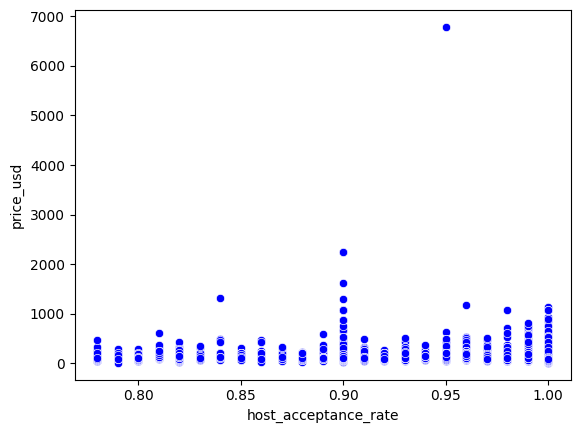

In [83]:

sns.scatterplot(x='host_acceptance_rate', y='price_usd', color="blue", data=df2)


In [84]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.00041749312460015453

In [85]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

0.020432648496955908

**Hotel room**

In [87]:
Y3= df3['price_usd']
X3= df3['host_acceptance_rate'].to_frame()

In [88]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [89]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [90]:
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-661.23076923]),
 'rank_': 1,
 'singular_': array([0.24529865]),
 'intercept_': 739.2907692307692}

<Axes: xlabel='host_acceptance_rate', ylabel='price_usd'>

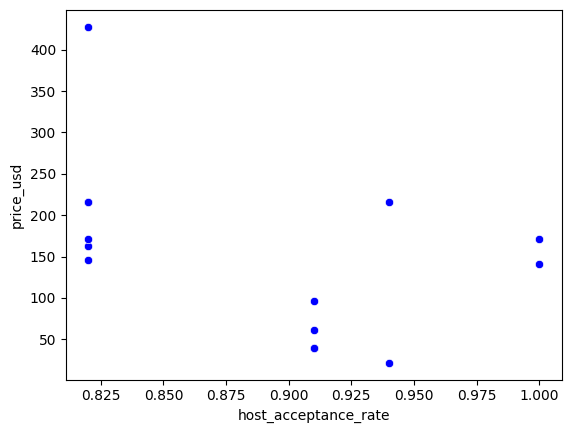

In [91]:
sns.scatterplot(x='host_acceptance_rate', y='price_usd', color="blue", data=df3)

In [92]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

0.18369690427058782

In [93]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

0.42859876839602307

**Private room**

In [94]:
Y4= df4['price_usd']
X4= df4['host_acceptance_rate'].to_frame()

In [95]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [96]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [97]:
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-56.29813295]),
 'rank_': 1,
 'singular_': array([3.03817422]),
 'intercept_': 134.49746679672793}

<Axes: xlabel='host_acceptance_rate', ylabel='price_usd'>

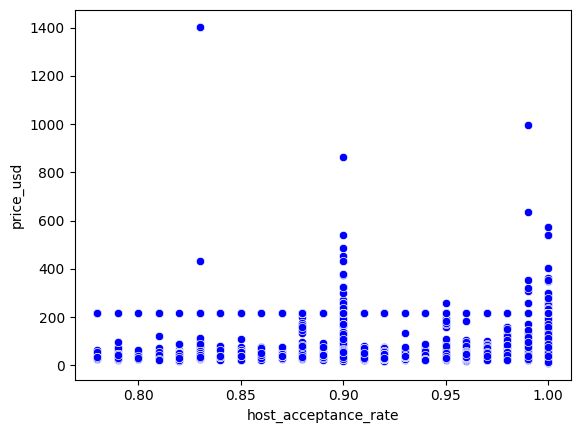

In [98]:
sns.scatterplot(x='host_acceptance_rate', y='price_usd', color="blue", data=df4)

In [99]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.001622685918510891

In [100]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

0.040282575867375846

**Shared room**

In [101]:
Y5= df5['price_usd']
X5= df5['host_acceptance_rate'].to_frame()

In [102]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [103]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [104]:
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-437.16844159]),
 'rank_': 1,
 'singular_': array([0.50334354]),
 'intercept_': 477.95418579365213}

<Axes: xlabel='host_acceptance_rate', ylabel='price_usd'>

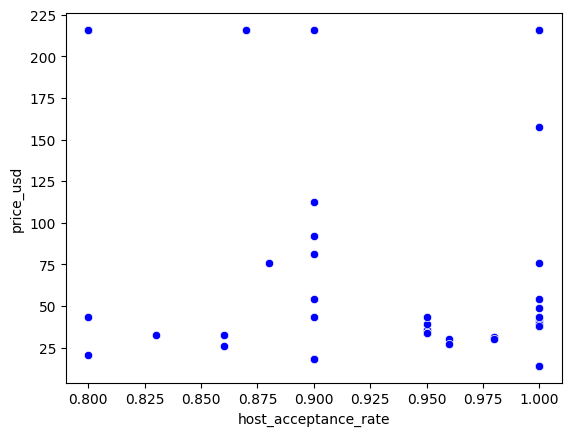

In [105]:
sns.scatterplot(x='host_acceptance_rate', y='price_usd', color="blue", data=df5)

In [106]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

0.1730129541114639

In [107]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

0.41594825893548815

# **“price vs host_is_superhost”** 

In [124]:
df0['host_is_superhost'] = df0['host_is_superhost'].replace({'f': 0, 't': 1})

**Entire home/apt**

In [125]:
Y6= df2['price_usd']
X6= df2['host_is_superhost'].to_frame()

In [126]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)

sklearn.linear_model._base.LinearRegression

In [127]:
model6.fit(X=X6, y=Y6)

LinearRegression()

In [131]:
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-20.36336273]),
 'rank_': 1,
 'singular_': array([37.21659361]),
 'intercept_': 167.523875026211}

<Axes: xlabel='host_is_superhost', ylabel='price_usd'>

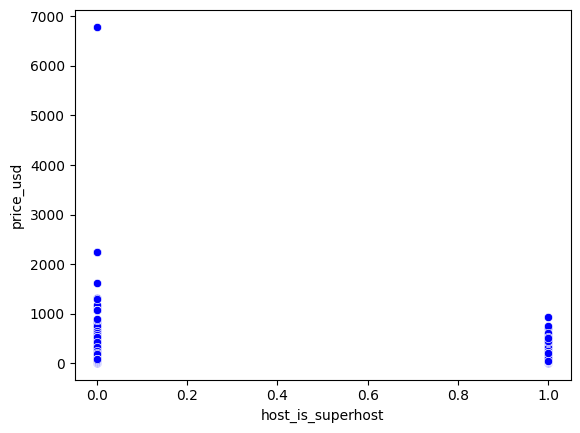

In [132]:
sns.scatterplot(x='host_is_superhost', y='price_usd', color="blue", data=df2)

In [133]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

0.004937705128874703

In [134]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

0.07026880622918467

**Hotel room**

In [135]:
Y7= df3['price_usd']
X7= df3['host_is_superhost'].to_frame()

In [136]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)

sklearn.linear_model._base.LinearRegression

In [137]:
model7.fit(X=X7, y=Y7)

LinearRegression()

In [138]:
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([5.04]),
 'rank_': 1,
 'singular_': array([1.30930734]),
 'intercept_': 151.02}

<Axes: xlabel='host_is_superhost', ylabel='price_usd'>

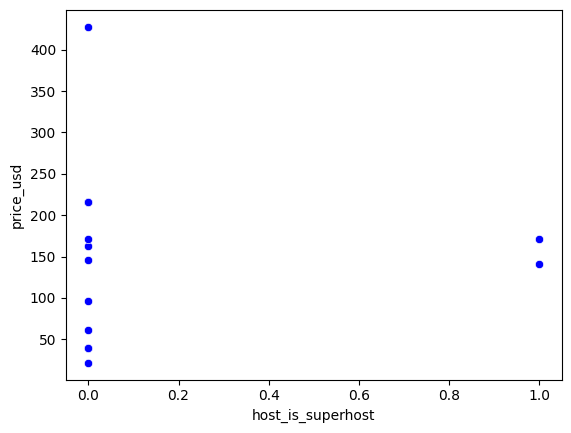

In [139]:
sns.scatterplot(x='host_is_superhost', y='price_usd', color="blue", data=df3)

In [140]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

0.00030405327447780017

In [141]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

0.01743712345766354

**Private room**


In [142]:
Y8= df4['price_usd']
X8= df4['host_is_superhost'].to_frame()

In [143]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)

sklearn.linear_model._base.LinearRegression

In [144]:
model8.fit(X=X8, y=Y8)

LinearRegression()

In [145]:
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-12.84262414]),
 'rank_': 1,
 'singular_': array([22.35364838]),
 'intercept_': 83.58343373493976}

<Axes: xlabel='host_is_superhost', ylabel='price_usd'>

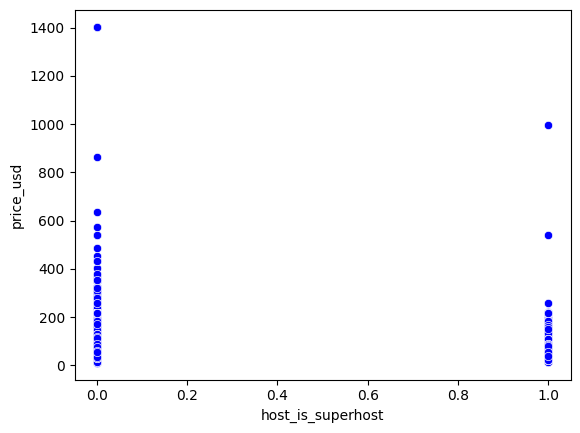

In [146]:
sns.scatterplot(x='host_is_superhost', y='price_usd', color="blue", data=df4)

In [147]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

0.004571150388244183

In [148]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

0.06761028315459257

**Shared room**

In [149]:
Y9= df5['price_usd']
X9= df5['host_is_superhost'].to_frame()

In [150]:
from sklearn.linear_model import LinearRegression
model9= LinearRegression()
type(model9)

sklearn.linear_model._base.LinearRegression

In [151]:
model9.fit(X=X9, y=Y9)

LinearRegression()

In [152]:
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-12.84262414]),
 'rank_': 1,
 'singular_': array([22.35364838]),
 'intercept_': 83.58343373493976}

<Axes: xlabel='host_is_superhost', ylabel='price_usd'>

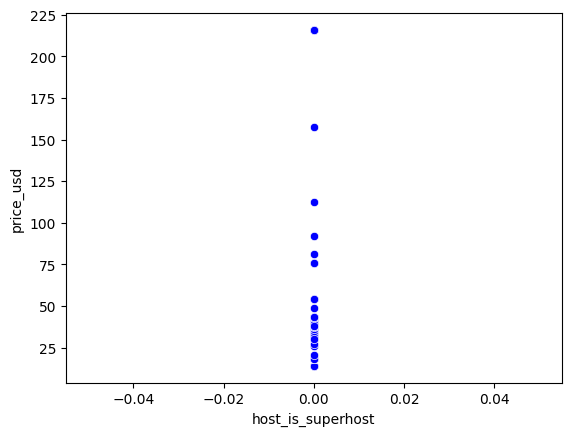

In [153]:
sns.scatterplot(x='host_is_superhost', y='price_usd', color="blue", data=df5)

In [154]:
coef_Deter9= model9.score(X=X9, y=Y9)
coef_Deter9

0.0

In [155]:
coef_Correl9= np.sqrt(coef_Deter9)
coef_Correl9

0.0

# **“accommodates vs bathrooms”**

**Entire home/apt**

In [157]:
Y10= df2['accommodates']
X10= df2['bathrooms'].to_frame()

In [158]:
from sklearn.linear_model import LinearRegression
model10= LinearRegression()
type(model10)

sklearn.linear_model._base.LinearRegression

In [159]:
model10.fit(X=X10, y=Y10)

LinearRegression()

<Axes: xlabel='bathrooms', ylabel='accommodates'>

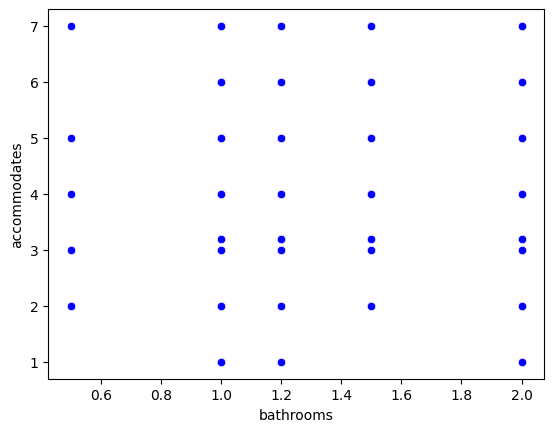

In [160]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df2)

In [161]:
coef_Deter10= model10.score(X=X10, y=Y10)
coef_Deter10

0.05211806188839607

In [162]:
coef_Correl10= np.sqrt(coef_Deter10)
coef_Correl10

0.22829380606664754

**Hotel room**

In [163]:
Y11= df3['accommodates']
X11= df3['bathrooms'].to_frame()

In [164]:
from sklearn.linear_model import LinearRegression
model11= LinearRegression()
type(model11)

sklearn.linear_model._base.LinearRegression

In [165]:
model11.fit(X=X11, y=Y11)

LinearRegression()

<Axes: xlabel='bathrooms', ylabel='accommodates'>

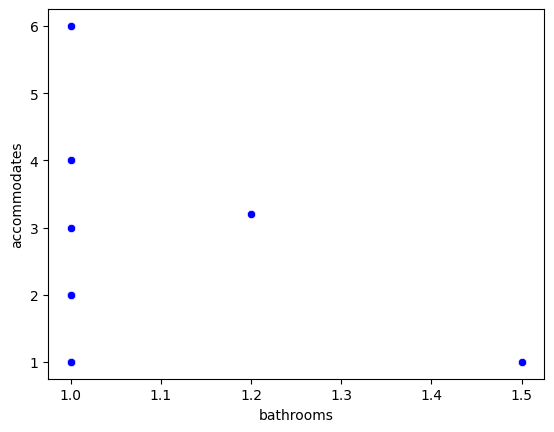

In [166]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df3)

In [167]:
coef_Deter11= model11.score(X=X11, y=Y11)
coef_Deter11

0.03440327679920241

In [168]:
coef_Correl11= np.sqrt(coef_Deter11)
coef_Correl11

0.18548120335819046

**Private room**

In [169]:
Y12= df4['accommodates']
X12= df4['bathrooms'].to_frame()

In [170]:
from sklearn.linear_model import LinearRegression
model12= LinearRegression()
type(model12)

sklearn.linear_model._base.LinearRegression

In [171]:
model12.fit(X=X12, y=Y12)

LinearRegression()

<Axes: xlabel='bathrooms', ylabel='accommodates'>

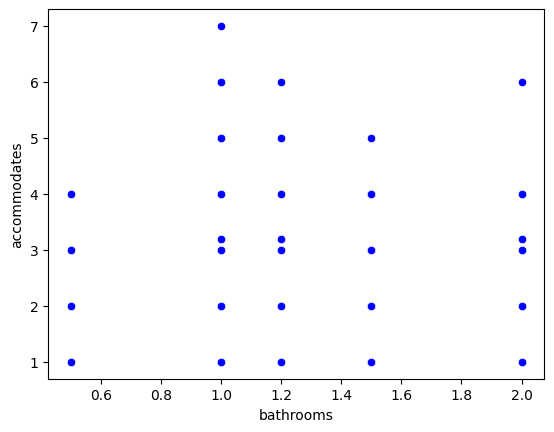

In [172]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df4)

In [173]:
coef_Deter12= model12.score(X=X12, y=Y12)
coef_Deter12

6.126302125708527e-05

In [174]:
coef_Correl12= np.sqrt(coef_Deter12)
coef_Correl12

0.007827069774640141

**Shared room**

In [175]:
Y13= df5['accommodates']
X13= df5['bathrooms'].to_frame()

In [176]:
from sklearn.linear_model import LinearRegression
model13= LinearRegression()
type(model13)

sklearn.linear_model._base.LinearRegression

In [177]:
model13.fit(X=X13, y=Y13)

LinearRegression()

<Axes: xlabel='bathrooms', ylabel='accommodates'>

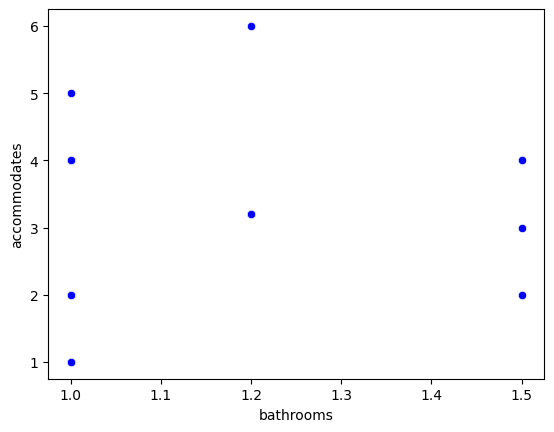

In [178]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df5)

In [179]:
coef_Deter13= model13.score(X=X13, y=Y13)
coef_Deter13

0.1923439925490289

In [180]:
coef_Correl13= np.sqrt(coef_Deter13)
coef_Correl13

0.438570396343653

# **“price vs review_scores_cleanliness”**

**Entire home/apt**

In [186]:
Y14= df2['price_usd']
X14= df2['review_scores_cleanliness'].to_frame()

In [187]:
from sklearn.linear_model import LinearRegression
model14= LinearRegression()
type(model14)

sklearn.linear_model._base.LinearRegression

In [188]:
model14.fit(X=X14, y=Y14)

LinearRegression()

<Axes: xlabel='review_scores_cleanliness', ylabel='price_usd'>

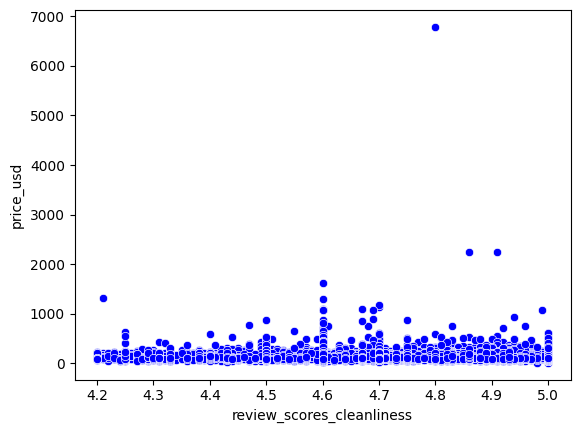

In [189]:
sns.scatterplot(x='review_scores_cleanliness', y='price_usd', color="blue", data=df2)

In [191]:
coef_Deter14= model14.score(X=X14, y=Y14)
coef_Deter14

0.0005589674208184015

In [192]:
coef_Correl14= np.sqrt(coef_Deter14)
coef_Correl14

0.023642491848754044

**Hotel room**


In [193]:
Y15= df3['price_usd']
X15= df3['review_scores_cleanliness'].to_frame()

In [194]:
from sklearn.linear_model import LinearRegression
model15= LinearRegression()
type(model15)

sklearn.linear_model._base.LinearRegression

In [196]:
model15.fit(X=X15, y=Y15)

LinearRegression()

<Axes: xlabel='review_scores_cleanliness', ylabel='price_usd'>

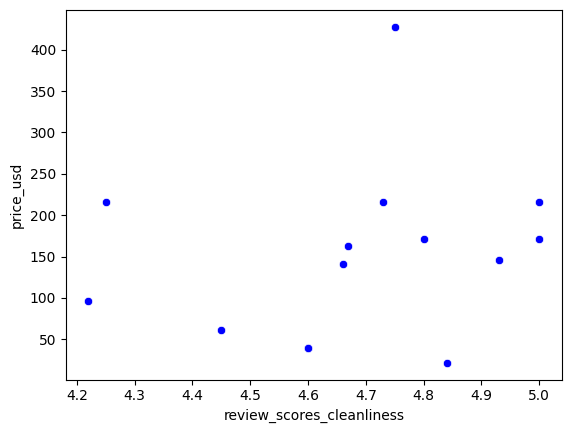

In [197]:
sns.scatterplot(x='review_scores_cleanliness', y='price_usd', color="blue", data=df3)

In [198]:
coef_Deter15= model15.score(X=X15, y=Y15)
coef_Deter15

0.0392398362737395

In [199]:
coef_Correl15= np.sqrt(coef_Deter15)
coef_Correl15

0.19809047496974583

**Private room**

In [200]:
Y16= df4['price_usd']
X16= df4['review_scores_cleanliness'].to_frame()

In [201]:
from sklearn.linear_model import LinearRegression
model16= LinearRegression()
type(model16)

sklearn.linear_model._base.LinearRegression

In [202]:
model16.fit(X=X16, y=Y16)

LinearRegression()

<Axes: xlabel='review_scores_cleanliness', ylabel='price_usd'>

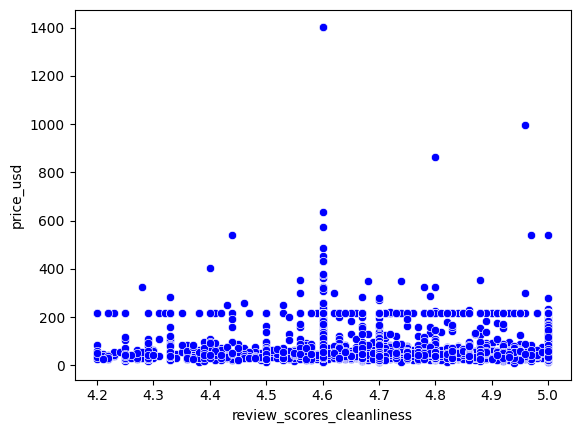

In [203]:
sns.scatterplot(x='review_scores_cleanliness', y='price_usd', color="blue", data=df4)

In [204]:
coef_Deter16= model16.score(X=X16, y=Y16)
coef_Deter16

2.1776424525943305e-05

In [205]:
coef_Correl16= np.sqrt(coef_Deter16)
coef_Correl16

0.0046665216731462105

**Shared room**

In [206]:
Y17= df5['price_usd']
X17= df5['review_scores_cleanliness'].to_frame()

In [207]:
from sklearn.linear_model import LinearRegression
model17= LinearRegression()
type(model17)

sklearn.linear_model._base.LinearRegression

In [208]:
model17.fit(X=X17, y=Y17)

LinearRegression()

<Axes: xlabel='review_scores_cleanliness', ylabel='price_usd'>

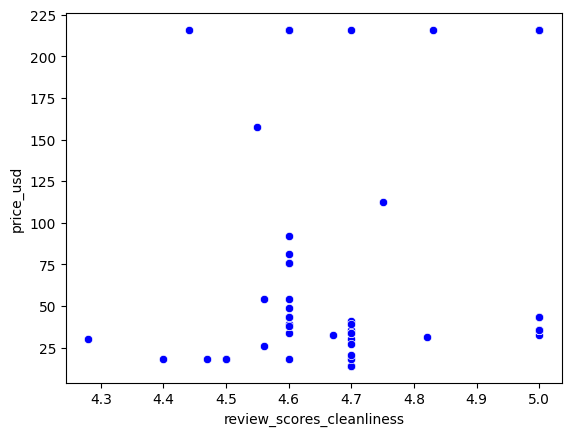

In [209]:
sns.scatterplot(x='review_scores_cleanliness', y='price_usd', color="blue", data=df5)

In [210]:
coef_Deter17= model17.score(X=X17, y=Y17)
coef_Deter17

0.04364051045214401

In [211]:
coef_Correl17= np.sqrt(coef_Deter17)
coef_Correl17

0.20890311259563368

# **“price vs host_identity_verified”**

**Entire home/apt**


In [276]:
df2['host_identity_verified'] = df2['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\496213050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['host_identity_verified'] = df2['host_identity_verified'].replace({'f': 0, 't': 1})


In [277]:
Y18= df2['price_usd']
X18= df2['host_identity_verified'].to_frame()

In [278]:
from sklearn.linear_model import LinearRegression
model18= LinearRegression()
type(model18)

sklearn.linear_model._base.LinearRegression

In [279]:
model18.fit(X=X18, y=Y18)

LinearRegression()

<Axes: xlabel='host_identity_verified', ylabel='price_usd'>

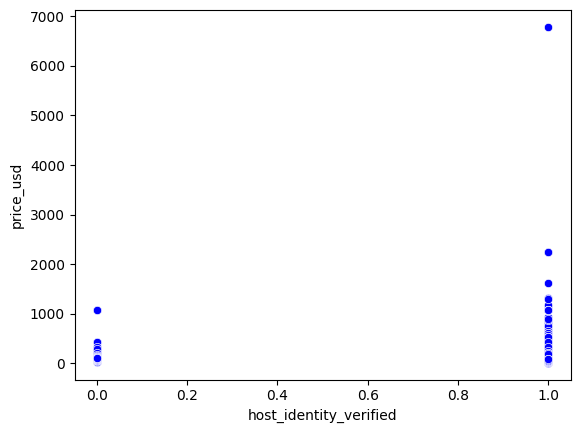

In [280]:
sns.scatterplot(x='host_identity_verified', y='price_usd', color="blue", data=df2)

In [281]:
coef_Deter18= model18.score(X=X18, y=Y18)
coef_Deter18

0.00017746552025554863

In [282]:
coef_Correl18= np.sqrt(coef_Deter18)
coef_Correl18

0.013321618529876489

**Hotel room**


In [283]:
df3['host_identity_verified'] = df3['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\767863696.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['host_identity_verified'] = df3['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\767863696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['host_identity_verified'] = df3['host_identity_verified'].replace({'f': 0, 't': 1})


In [284]:
Y19= df3['price_usd']
X19= df3['host_identity_verified'].to_frame()

In [285]:
from sklearn.linear_model import LinearRegression
model19= LinearRegression()
type(model19)

sklearn.linear_model._base.LinearRegression

In [286]:
model19.fit(X=X19, y=Y19)

LinearRegression()

<Axes: xlabel='host_identity_verified', ylabel='price_usd'>

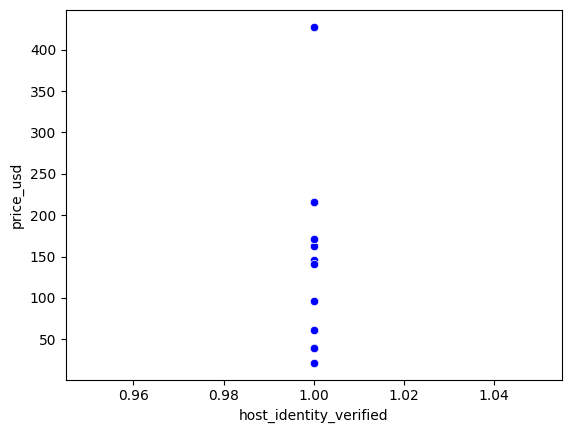

In [287]:
sns.scatterplot(x='host_identity_verified', y='price_usd', color="blue", data=df3)

In [288]:
coef_Deter19= model19.score(X=X19, y=Y19)
coef_Deter19

0.0

In [289]:
coef_Correl19= np.sqrt(coef_Deter19)
coef_Correl19

0.0

**Private room**
 

In [290]:
df4['host_identity_verified'] = df4['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\701536068.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4['host_identity_verified'] = df4['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\701536068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['host_identity_verified'] = df4['host_identity_verified'].replace({'f': 0, 't': 1})


In [291]:
Y20= df4['price_usd']
X20= df4['host_identity_verified'].to_frame()

In [292]:
from sklearn.linear_model import LinearRegression
model20= LinearRegression()
type(model20)

sklearn.linear_model._base.LinearRegression

In [293]:
model20.fit(X=X20, y=Y20)

LinearRegression()

<Axes: xlabel='host_identity_verified', ylabel='price_usd'>

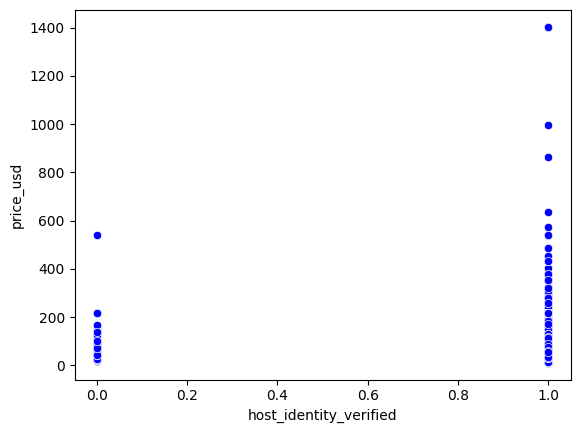

In [294]:
sns.scatterplot(x='host_identity_verified', y='price_usd', color="blue", data=df4)

In [295]:
coef_Deter20= model20.score(X=X20, y=Y20)
coef_Deter20

0.0013152373644303994

In [296]:
coef_Correl20= np.sqrt(coef_Deter20)
coef_Correl20

0.036266201406135706

**Shared room**

In [297]:
df5['host_identity_verified'] = df5['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\3271687046.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5['host_identity_verified'] = df5['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\3271687046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['host_identity_verified'] = df5['host_identity_verified'].replace({'f': 0, 't': 1})


In [298]:
Y21= df5['price_usd']
X21= df5['host_identity_verified'].to_frame()

In [299]:
from sklearn.linear_model import LinearRegression
model21= LinearRegression()
type(model21)

sklearn.linear_model._base.LinearRegression

In [300]:
model21.fit(X=X21, y=Y21)

LinearRegression()

<Axes: xlabel='host_identity_verified', ylabel='price_usd'>

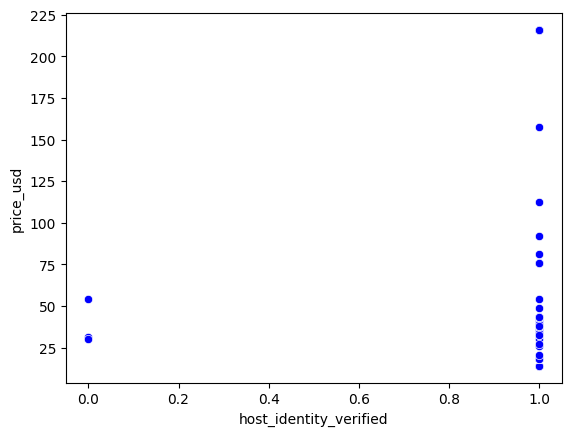

In [301]:
sns.scatterplot(x='host_identity_verified', y='price_usd', color="blue", data=df5)

In [302]:
coef_Deter21= model21.score(X=X21, y=Y21)
coef_Deter21

0.014592912427247029

In [303]:
coef_Correl21= np.sqrt(coef_Deter21)
coef_Correl21

0.12080112759095847

# **“price vs instant_bookable”**

**Entire home/apt**


In [306]:
df2['instant_bookable'] = df2['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\3142435412.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['instant_bookable'] = df2['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\3142435412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['instant_bookable'] = df2['instant_bookable'].replace({'f': 0, 't': 1})


In [307]:
Y22= df2['price_usd']
X22= df2['instant_bookable'].to_frame()

In [308]:
from sklearn.linear_model import LinearRegression
model22= LinearRegression()
type(model22)

sklearn.linear_model._base.LinearRegression

In [309]:
model22.fit(X=X22, y=Y22)

LinearRegression()

<Axes: xlabel='instant_bookable', ylabel='price_usd'>

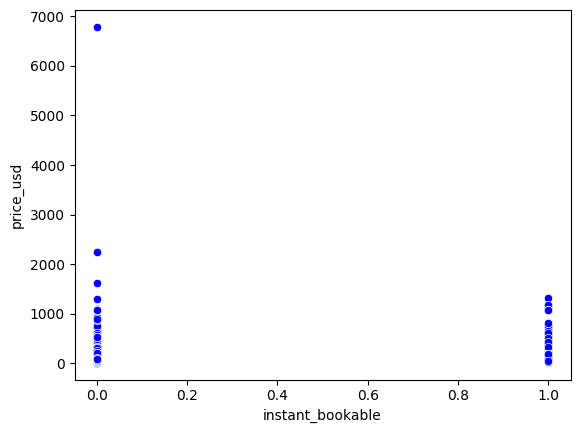

In [310]:
sns.scatterplot(x='instant_bookable', y='price_usd', color="blue", data=df2)

In [311]:
coef_Deter22= model22.score(X=X22, y=Y22)
coef_Deter22

0.0019310742378835233

In [312]:
coef_Correl22= np.sqrt(coef_Deter22)
coef_Correl22

0.04394398978112392

**Hotel room**

In [313]:
df3['instant_bookable'] = df3['instant_bookable'].replace({'f': 0, 't': 1})
 

C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\785953535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['instant_bookable'] = df3['instant_bookable'].replace({'f': 0, 't': 1})


In [314]:
Y23= df3['price_usd']
X23= df3['instant_bookable'].to_frame()

In [315]:
from sklearn.linear_model import LinearRegression
model23= LinearRegression()
type(model23)

sklearn.linear_model._base.LinearRegression

In [316]:
model23.fit(X=X23, y=Y23)

LinearRegression()

<Axes: xlabel='instant_bookable', ylabel='price_usd'>

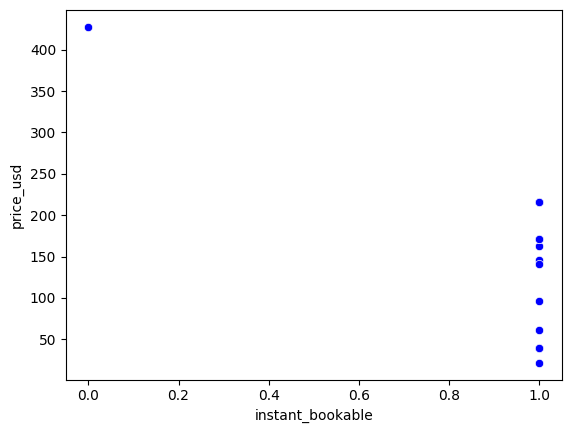

In [317]:
sns.scatterplot(x='instant_bookable', y='price_usd', color="blue", data=df3)

In [318]:
coef_Deter23= model23.score(X=X23, y=Y23)
coef_Deter23

0.5725578972460731

In [319]:
coef_Correl23= np.sqrt(coef_Deter23)
coef_Correl23

0.7566755561309438

**Private room**

In [320]:
df4['instant_bookable'] = df4['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\1193581689.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4['instant_bookable'] = df4['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\1193581689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['instant_bookable'] = df4['instant_bookable'].replace({'f': 0, 't': 1})


In [321]:
Y24= df4['price_usd']
X24= df4['instant_bookable'].to_frame()

In [322]:
from sklearn.linear_model import LinearRegression
model24= LinearRegression()
type(model24)

sklearn.linear_model._base.LinearRegression

In [323]:
model24.fit(X=X24, y=Y24)

LinearRegression()

<Axes: xlabel='instant_bookable', ylabel='price_usd'>

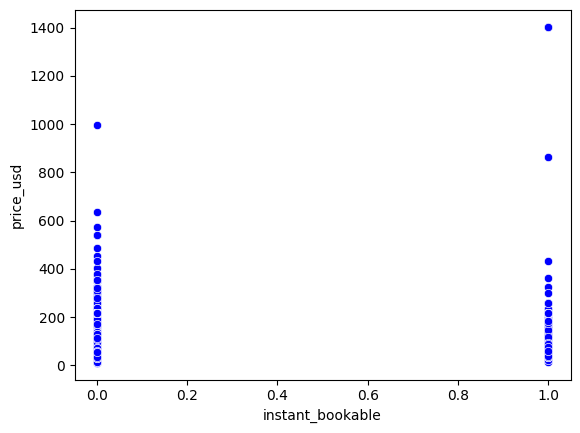

In [324]:
sns.scatterplot(x='instant_bookable', y='price_usd', color="blue", data=df4)

In [325]:
coef_Deter24= model24.score(X=X24, y=Y24)
coef_Deter24

0.005814013304592303

In [326]:
coef_Correl24= np.sqrt(coef_Deter24)
coef_Correl24

0.07624967740648024

**Shared room**

In [327]:
df5['instant_bookable'] = df5['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\3406653543.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5['instant_bookable'] = df5['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\3406653543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['instant_bookable'] = df5['instant_bookable'].replace({'f': 0, 't': 1})


In [328]:
Y25= df5['price_usd']
X25= df5['instant_bookable'].to_frame()

In [329]:
from sklearn.linear_model import LinearRegression
model25= LinearRegression()
type(model25)

sklearn.linear_model._base.LinearRegression

In [330]:
model25.fit(X=X25, y=Y25)

LinearRegression()

<Axes: xlabel='instant_bookable', ylabel='price_usd'>

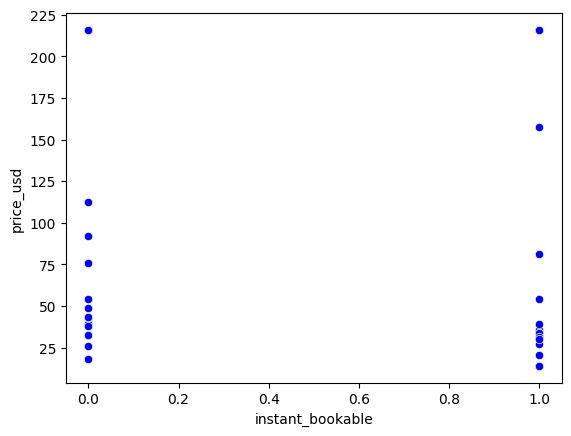

In [331]:
sns.scatterplot(x='instant_bookable', y='price_usd', color="blue", data=df5)

In [332]:
coef_Deter25= model25.score(X=X25, y=Y25)
coef_Deter25

0.014926952326299925

In [333]:
coef_Correl25= np.sqrt(coef_Deter25)
coef_Correl25

0.12217590730704611

# **“Price vs property_type”**

In [381]:
df9 = df3.groupby(['property_type'])['property_type'].count()
df9

Series([], Name: property_type, dtype: int64)

**Entire home/apt**

In [369]:
df2['property_type'] = df2['property_type'].replace({
    'Boat': 1,
    'Camper/RV': 2,
    'Casa particular': 3,
    'Castle': 4,
    'Entire bungalow': 5,
    'Entire cabin': 6,
    'Entire chalet': 7,
    'Entire condo': 8,
    'Entire cottage': 9,
    'Entire guest suite': 10,
    'Entire guesthouse': 11,
    'Entire home': 12,
    'Entire loft': 13,
    'Entire place': 14,
    'Entire rental unit': 15,
    'Entire serviced apartment': 16,
    'Entire townhouse': 17,
    'Entire vacation home': 18,
    'Entire villa': 19,
    'Houseboat': 20,
    'Room in aparthotel': 21,
    'Tiny home': 22
})


C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\3006165555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['property_type'] = df2['property_type'].replace({


In [370]:
Y26= df2['price_usd']
X26= df2['property_type'].to_frame()

In [371]:
from sklearn.linear_model import LinearRegression
model26= LinearRegression()
type(model26)

sklearn.linear_model._base.LinearRegression

In [372]:
model26.fit(X=X26, y=Y26)

LinearRegression()

<Axes: xlabel='property_type', ylabel='price_usd'>

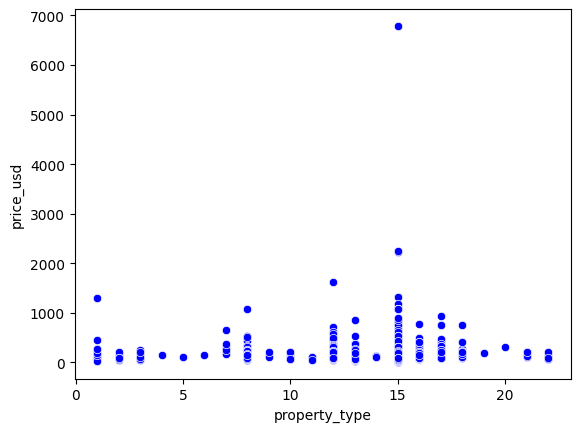

In [373]:
sns.scatterplot(x='property_type', y='price_usd', color="blue", data=df2)

In [374]:
coef_Deter26= model26.score(X=X26, y=Y26)
coef_Deter26

0.000928603804020045

In [375]:
coef_Correl26= np.sqrt(coef_Deter26)
coef_Correl26

0.03047300123092645

**Hotel room**


In [376]:
df3['property_type'] = df3['property_type'].replace({
    'Room in boutique hotel': 1,
    'Room in hostel': 2
})

C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\920888692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['property_type'] = df3['property_type'].replace({


In [377]:
Y27= df3['price_usd']
X27= df3['property_type'].to_frame()

In [378]:
from sklearn.linear_model import LinearRegression
model27= LinearRegression()
type(model27)

sklearn.linear_model._base.LinearRegression

In [379]:
model27.fit(X=X27, y=Y27)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<Axes: >

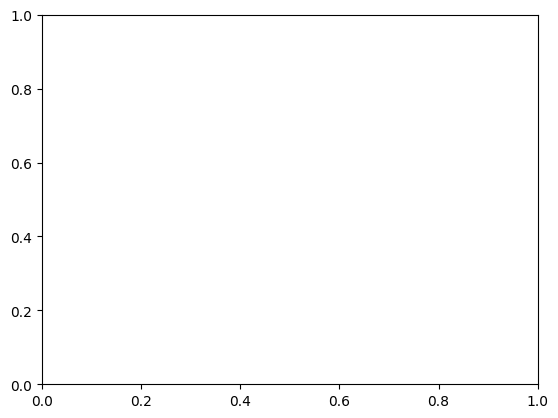

In [366]:
sns.scatterplot(x='property_type', y='price_usd', color="blue", data=df3)

In [367]:
coef_Deter27= model27.score(X=X27, y=Y27)
coef_Deter27

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
coef_Correl27= np.sqrt(coef_Deter27)
coef_Correl27

**Private room**


In [382]:
df4['property_type'] = df4['property_type'].replace({
    'Private room': 1,
    'Private room in bed and breakfast': 2,
    'Private room in camper/rv': 3,
    'Private room in casa particular': 4,
    'Private room in condo': 5,
    'Private room in guest suite': 6,
    'Private room in guesthouse': 7,
    'Private room in home': 8,
    'Private room in hostel': 9,
    'Private room in loft': 10,
    'Private room in rental unit': 11,
    'Private room in serviced apartment': 12,
    'Private room in townhouse': 13,
    'Private room in vacation home': 14,
    'Room in aparthotel': 15,
    'Room in boutique hotel': 16,
    'Room in hotel': 17
})

C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\4177713725.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4['property_type'] = df4['property_type'].replace({
C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\4177713725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['property_type'] = df4['property_type'].replace({


In [383]:
Y28= df4['price_usd']
X28= df4['property_type'].to_frame()

In [384]:
from sklearn.linear_model import LinearRegression
model28= LinearRegression()
type(model28)

sklearn.linear_model._base.LinearRegression

In [385]:
model28.fit(X=X28, y=Y28)

LinearRegression()

<Axes: xlabel='property_type', ylabel='price_usd'>

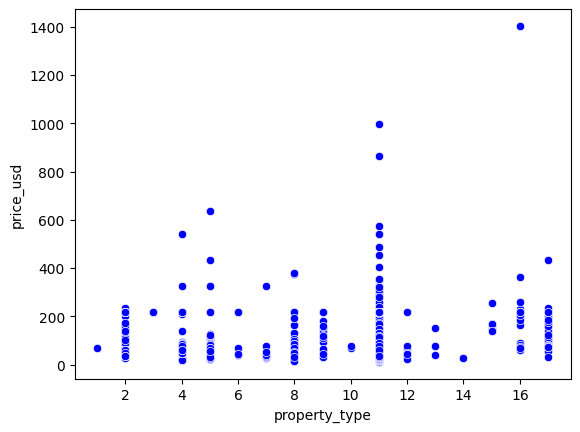

In [386]:
sns.scatterplot(x='property_type', y='price_usd', color="blue", data=df4)

In [387]:
coef_Deter28= model28.score(X=X28, y=Y28)
coef_Deter28

0.0011740059663316593

In [388]:
coef_Correl28= np.sqrt(coef_Deter28)
coef_Correl28

0.034263770462861484

**Shared room**

In [389]:
df5['property_type'] = df5['property_type'].replace({
    'Shared room': 1,
    'Shared room in casa particular': 2,
    'Shared room in condo': 3,
    'Shared room in home': 4,
    'Shared room in hostel': 5,
    'Shared room in hotel': 6,
    'Shared room in lighthouse': 7,
    'Shared room in loft': 8,
    'Shared room in rental unit': 9,
})

C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\3053472832.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5['property_type'] = df5['property_type'].replace({
C:\Users\kidfr\AppData\Local\Temp\ipykernel_25984\3053472832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['property_type'] = df5['property_type'].replace({


In [390]:
Y29= df5['price_usd']
X29= df5['property_type'].to_frame()

In [391]:
from sklearn.linear_model import LinearRegression
model29= LinearRegression()
type(model29)

sklearn.linear_model._base.LinearRegression

In [392]:
model29.fit(X=X29, y=Y29)

LinearRegression()

<Axes: xlabel='property_type', ylabel='price_usd'>

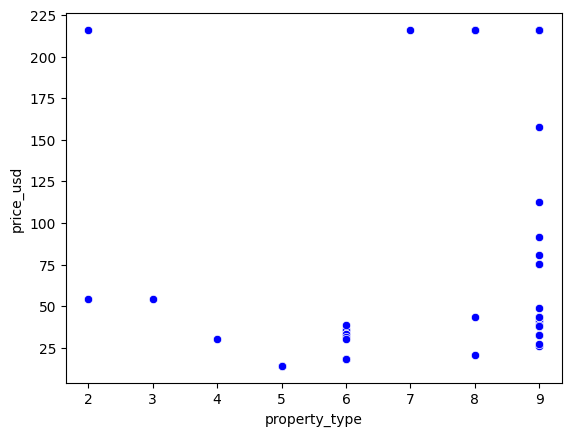

In [393]:
sns.scatterplot(x='property_type', y='price_usd', color="blue", data=df5)

In [394]:
coef_Deter29= model29.score(X=X29, y=Y29)
coef_Deter29

0.042238332041242166

In [395]:
coef_Correl29= np.sqrt(coef_Deter29)
coef_Correl29

0.20551966339317065

# **7**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal 
Vars_Indep = df0[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
    'host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']]
Var_Dep = df0['price']

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal accommodates vs bathrooms
Vars_Indep2= df0 [['bathrooms']]
Var_Dep2 = df0['accommodates']

In [ ]:
from sklearn.linear_model import LinearRegression
model30 = LinearRegression()
model31= LinearRegression()

In [ ]:
type(model30)
type(model31)

In [ ]:
model30.fit(X=Vars_Indep, y=Var_Dep)
model31.fit(X=Vars_Indep2, y=Var_Dep2)

In [ ]:
model30.__dict__

In [ ]:
model31.__dict__

In [ ]:
y_pred= model30.predict(X=df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
y_pred

In [ ]:
#insertamos la columna de predicciones en el DataFrame 
df0.insert(0, 'Predicciones', y_pred)
df0

In [ ]:
y_pred2= model31.predict(X=df0[['bathrooms']])
y_pred2

In [ ]:
df0.insert(1, 'Predicciones2', y_pred2)
df0

In [ ]:
coef_Deter30= model30.score(X=Vars_Indep, y=Var_Dep)
coef_Deter30

In [ ]:
coef_Deter31= model31.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter31

In [ ]:
coef_Correl30=np.sqrt(coef_Deter30)
coef_Correl30

In [ ]:
coef_Correl31=np.sqrt(coef_Deter31)
coef_Correl31

In [ ]:
df0['predicted_price'] = model30.predict(df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
df0['predicted_accommodates'] = model31.predict(df1[['bathrooms']])

In [ ]:
df0= df0.drop(['room_type'], axis=1)

In [ ]:
sns.pairplot(df0)

In [ ]:
Corr_Factors30= df0.corr()
Corr_Factors30

In [ ]:
Corr_Factors31= abs(Corr_Factors30)
Corr_Factors31

In [ ]:
Heart_Nap = sns.heatmap(Corr_Factors31, cmap= 'coolwarm')
Heart_Nap

In [ ]:
Heart_Nap = sns.heatmap(Corr_Factors31, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap